### Проект 3. Этап 2 (25 баллов)

**Описание**

Во время осуществления экскурсионного тура необходимо предусмотреть возможность для участников пополнить запасы энергии, а именно найти кафе или ресторан, расположенный неподалеку от второй достопримечательности. Расстояние от второй достопримечательности до места питания должно быть ограничено радиусом Х метров, который будет задан во входных данных.

В вашем распоряжении следующие подсказки:
- Сначала необходимо найти все рестораны или кафе в заданном радиусе.
- Затем определить, какая кухня является наиболее популярной. Не учитывать рестораны/кафе с `nan`, `regional` или `coffee_shop` кухней.
- Случайным образом выбрать одно из мест питания (из первого пункта) с такой кухней.

**Входные данные**

На вход поступают:
- Координаты трех достопримечательностей:
    - "Башня Исеть": (56.84357, 60.59071),
    - "Здание администрации": (56.83720, 60.59766),
    - "Плотинка (Камень Любви)": (56.8377927, 60.6036443)
- Радиус X = 600м.


**Выходные данные**

Ваша программа должна вывести название популярной кухни, название выбранного ресторана/кафе с этой кухней и его координаты.


**Пример ответа**

```
russian

Ресторан/кафе для достопримечательности 2: Medved'.

Координаты ресторана: (45.588, 36.58925)
```

**Оценивание**

- Без вывода - 0 баллов.
- Корректно найдена самая популярная кухня - 15 баллов.
- Корректно найден ресторан такой кухни - 5 баллов.
- Корректно выведена требуемая информация о ресторане - 5 баллов.
- Полное выполнение - 25 баллов.

Для подсчета баллов простого вывода недостаточно: необходимо предоставить обоснование и приложить код.

Удачи в решении задачи!

In [ ]:
!pip install osmnx

In [ ]:
import networkx as nx
import osmnx as ox

ox.__version__

'1.9.3'

In [ ]:
attractions = {"Башня_Исеть": (56.84357, 60.59071),
               "Здание_администрации": (56.83720, 60.59766),
               "Плотинка_Камень_Любви": (56.8377927, 60.6036443)}

In [ ]:
origin_nodes = {}
for attraction, coordinates in attractions.items():
    G = ox.graph.graph_from_point(coordinates, dist=100, dist_type="network", network_type="walk")
    origin_node = ox.distance.nearest_nodes(G, coordinates[1], coordinates[0])
    attractions[attraction] = (G.nodes[origin_node]["y"], G.nodes[origin_node]["x"])
    print(attraction, coordinates)
    print(origin_node, attractions[attraction])
    origin_nodes[attraction] = origin_node

Башня_Исеть (56.84357, 60.59071)
5121112983 (56.8436053, 60.5912917)
Здание_администрации (56.8372, 60.59766)
783674133 (56.8373442, 60.5975434)
Плотинка_Камень_Любви (56.8377927, 60.6036443)
412069058 (56.8375431, 60.6033385)


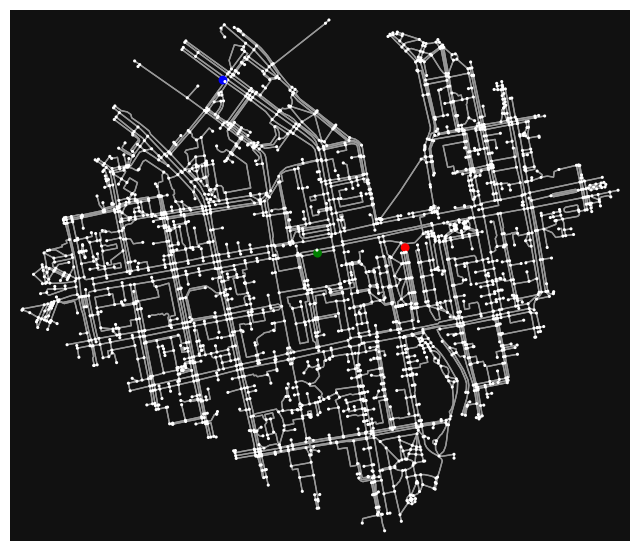

In [ ]:
origin_nodes_transponned = {}
radius = 1250
for attraction, node in origin_nodes.items():
    origin_nodes_transponned[node] = attraction
colors = {}
colors['Башня_Исеть'] = 'b'
colors['Здание_администрации'] = 'g'
colors['Плотинка_Камень_Любви'] = 'r'
G = ox.graph.graph_from_point(attractions['Здание_администрации'], dist=radius, dist_type="network", network_type="walk")
nc = [colors[origin_nodes_transponned[node]] if node in origin_nodes.values() else "w" for node in G.nodes()]
ns = [40 if node in origin_nodes.values() else 5 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc)

In [ ]:
start = attractions['Башня_Исеть']
medium = attractions['Здание_администрации']
end = attractions['Плотинка_Камень_Любви']

print(start)
print(medium)
print(end)

(56.8436053, 60.5912917)
(56.8373442, 60.5975434)
(56.8375431, 60.6033385)


In [ ]:
import pandas as pd
pd.options.display.max_columns = 100

In [ ]:
# osm tag
X = 600
tags = {"amenity": "restaurant"}

# retrieve feature from point
cafes = ox.features_from_point(medium, tags, dist=X)

# list first 5 rows from geodataframe
cafes.head(5)

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

amenity         brand brand:wikidata  \
element_type osmid                                                
node         474951901  restaurant      IL Патио       Q4397763   
             474951902  restaurant           NaN            NaN   
             586185546  restaurant  Планета Суши      Q62739250   
             619248592  restaurant   TGI Fridays       Q1524184   
             706971704  restaurant           NaN            NaN   

                       brand:wikipedia          cuisine          name  \
element_type osmid                                                      
node         474951901     en:Росинтер          italian      IL Патио   
             474951902             NaN  italian;russian     Cash Flow   
             586185546             NaN            sushi  Планета Суши   
             619248592  en:TGI Fridays         american   TGI Fridays   
             706971704             NaN          seafood   Порт Стенли   

                            operator            phone    smoking  \
element_type osmid                                                 
node         474951901      Росинтер  +7 34337 761-03  separated   
             474951902      Росинтер              NaN  separated   
             586185546      Росинтер              NaN        NaN   
             619248592  Ростик’с-KFC              NaN        NaN   
             706971704           NaN              NaN        NaN   

                                                 website  \
element_type osmid                                         
node         474951901               https://ilpatio.ru/   
             474951902                               NaN   
             586185546  http://planet-sushi.rosinter.ru/   
             619248592        https://www.tgifridays.ru/   
             706971704                               NaN   

                                         geometry wheelchair  \
element_type osmid                                             
node         474951901  POINT (60.59934 56.83473)        NaN   
             474951902  POINT (60.59094 56.83540)         no   
             586185546  POINT (60.59928 56.83493)        NaN   
             619248592  POINT (60.59931 56.83483)        NaN   
             706971704  POINT (60.60636 56.83407)        NaN   

                                      name:en       name:ru addr:housenumber  \
element_type osmid                                                             
node         474951901                    NaN           NaN              NaN   
             474951902                    NaN           NaN              NaN   
             586185546           Planet Sushi  Планета Суши              NaN   
             619248592  Thank God It's Friday           NaN               8Д   
             706971704                    NaN           NaN              NaN   

                          addr:street internet_access      opening_hours  \
element_type osmid                                                         
node         474951901            NaN             NaN                NaN   
             474951902            NaN             NaN                NaN   
             586185546            NaN             NaN                NaN   
             619248592  улица 8 Марта            wlan                NaN   
             706971704            NaN             NaN  Mo-Su 12:00-24:00   

                       addr:postcode contact:phone contact:website  \
element_type osmid                                                   
node         474951901           NaN           NaN             NaN   
             474951902           NaN           NaN             NaN   
             586185546           NaN           NaN             NaN   
             619248592           NaN           NaN             NaN   
             706971704           NaN           NaN             NaN   

                       contact:email addr:city indoor_seating outdoor_seating  \
element_type osmid              

In [ ]:
cafes.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(34, 30)

In [ ]:
cafes = cafes.dropna(subset=['cuisine'])
cafes.shape

(19, 30)

In [ ]:
cafes = cafes[cafes['cuisine'] != 'coffee_shop']
cafes.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(19, 30)

In [ ]:
cafes = cafes[cafes['cuisine'] != 'regional']
cafes.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(17, 30)

In [ ]:
popular_cuisine = (cafes['cuisine'].mode()[0])
print(popular_cuisine)

italian


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cafe_list = cafes[cafes['cuisine'] == popular_cuisine]
our_cafe = cafe_list.sample(1)
our_cafe

,,amenity,brand,brand:wikidata,brand:wikipedia,cuisine,name,operator,phone,smoking,website,geometry,wheelchair,name:en,name:ru,addr:housenumber,addr:street,internet_access,opening_hours,addr:postcode,contact:phone,contact:website,contact:email,addr:city,indoor_seating,outdoor_seating,contact:vk,website:menu,nodes,building,building:levels
element_type,osmid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
node,474951901,restaurant,IL Патио,Q4397763,en:Росинтер,italian,IL Патио,Росинтер,+7 34337 761-03,separated,https://ilpatio.ru/,POINT (60.59934 56.83473),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(popular_cuisine)
print()
print('Ресторан/кафе для достопримечательности 2:', our_cafe['name'][0])
print()
print('Координаты ресторана:', str(our_cafe['geometry'][0])[6:])

italian

Ресторан/кафе для достопримечательности 2: IL Патио

Координаты ресторана: (60.5993411 56.8347292)
